In [1]:
pip install tensorflow

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pickle
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
import winsound
frequency = 2500
duration = 1000

In [5]:
folder = 'C:\\Users\\shah4\\OneDrive\\Desktop\\SOC\\archive\\train'
classes = ['open_eyes','closed_eyes']

train_data = []

for i in classes:
    path = os.path.join(folder,i)
    class_num = classes.index(i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        rgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        new_array = cv2.resize(rgb,(224,224))
        train_data.append([new_array,class_num])

In [6]:
import random

random.shuffle(train_data)

In [7]:
x = []
y = []

for i,j in train_data:
    x.append(i)
    y.append(j)
    

x = np.array(x).reshape(-1,224,224,3)

In [8]:
x.shape

(4000, 224, 224, 3)

In [9]:
# normalize  the data

x = x/255.0

In [10]:
y = np.array(y)

In [11]:
# Pickle is used for serialization

import pickle 

pickle_out = open('x.pickle','wb')
pickle.dump(x,pickle_out) # This is used to serialize an object hierarchy
pickle_out.close

pickle_out = open('y.pickle', 'wb')
pickle.dump(y,pickle_out)
pickle_out.close

<function BufferedWriter.close>

In [12]:
pickle_in = open('x.pickle','rb')
x = pickle.load(pickle_in)

pickle_in = open('y.pickle','rb')
y = pickle.load(pickle_in)

In [13]:
model = tf.keras.applications.mobilenet.MobileNet()

In [14]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

In [15]:
base_input = model.layers[0].input

In [16]:
base_output = model.layers[-4].output

In [17]:
flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flat_layer)
final_op = layers.Activation('sigmoid')(final_output)

In [18]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [19]:
new_model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])

In [20]:
new_model.fit(x,y,epochs=10, validation_split= 0.1)

Epoch 1/10
113/113 [==============================] - 171s 1s/step - loss: 0.6446 - accuracy: 0.9550 - val_loss: 0.6966 - val_accuracy: 0.9525
Epoch 2/10
113/113 [==============================] - 175s 2s/step - loss: 0.2060 - accuracy: 0.9856 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
113/113 [==============================] - 167s 1s/step - loss: 0.0898 - accuracy: 0.9942 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
113/113 [==============================] - 170s 2s/step - loss: 0.0255 - accuracy: 0.9983 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
113/113 [==============================] - 164s 1s/step - loss: 0.0255 - accuracy: 0.9983 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
113/113 [==============================] - 168s 1s/step - loss: 0.8556 - accuracy: 0.9439 - val_loss: 6.5324 - val_accuracy: 0.5675
Epoch 7/10
113/113 [==============================] - 164s 1s/step - loss: 3.0492 - accuracy: 0.7908 - val_loss: 7.5480 - val_

In [21]:
new_model.save('my_model.h5')  

C:\Users\shah4\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
new_model = tf.keras.models.load_model('my_model.h5')

In [23]:
img = cv2.imread('C:\\Users\\shah4\\OneDrive\\Desktop\\SOC\\drive-download-20230717T173825Z-001\\open-test_1.png',cv2.IMREAD_GRAYSCALE)
rgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
new = cv2.resize(rgb , (224,224))

In [24]:
x_input = np.array(new).reshape(1,224,224,3)

In [25]:
x_input.shape

(1, 224, 224, 3)

In [26]:
x_input = x_input/255.0

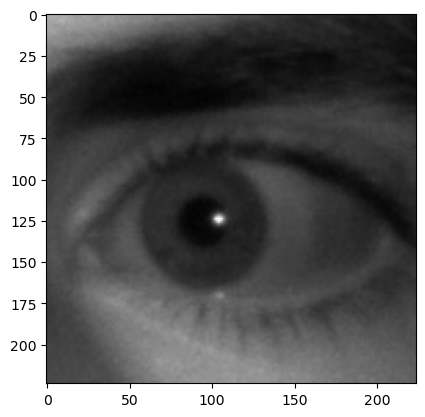

In [27]:
plt.imshow(new)

In [28]:
prediction = new_model.predict(x_input)

1/1 [==============================] - 0s 432ms/step


In [29]:
prediction

array([[-26.18493]], dtype=float32)

In [30]:
img = cv2.imread('C:\\Users\\shah4\\OneDrive\\Desktop\\SOC\\drive-download-20230717T173825Z-001\\closed_test_1.png',cv2.IMREAD_GRAYSCALE)
rgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
new = cv2.resize(rgb , (224,224))

In [31]:
x_input = np.array(new).reshape(1,224,224,3)

In [32]:
x_input.shape

(1, 224, 224, 3)

In [33]:
x_input = x_input/255.0

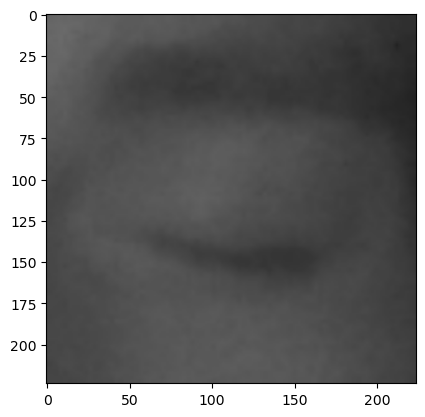

In [34]:
plt.imshow(new)

In [35]:
prediction = new_model.predict(x_input)

1/1 [==============================] - 0s 48ms/step


In [36]:
prediction

array([[12.94907]], dtype=float32)

In [37]:
img = cv2.imread('C:\\Users\\shah4\\OneDrive\\Desktop\\SOC\\drive-download-20230717T173825Z-001\\full_face.jpg')

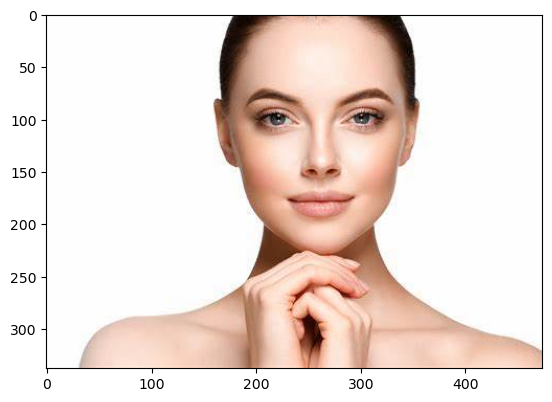

In [38]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [39]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [40]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [41]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [42]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [43]:
for x,y,w,h in eyes[:2]:
    cv2.rectangle(img,(x,y),(x+w,y+h), (0,255,0),2)

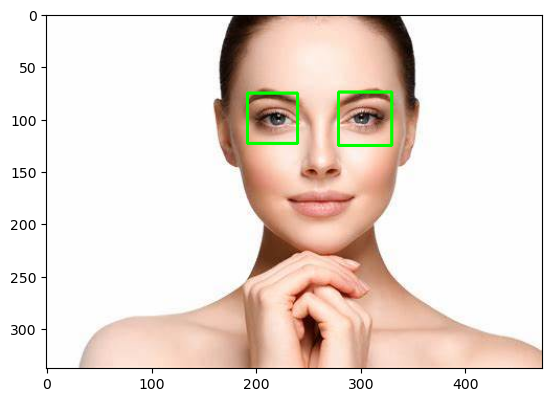

In [47]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [48]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes[:2]:
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print('eyes are not detected')
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey:ey+eh,ex:ex+ew]

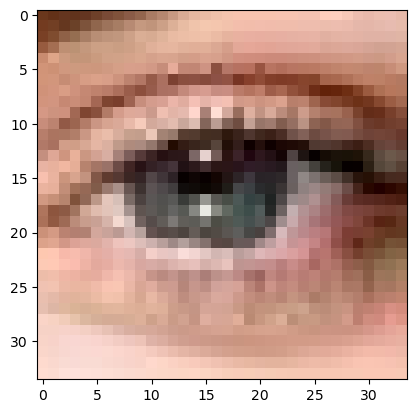

In [49]:
plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2RGB))

In [50]:
final_image = cv2.resize(eyes_roi,(224,224))
final_image = np.expand_dims(final_image,axis=0)
final_image = final_image/255.0

In [51]:
final_image.shape

(1, 224, 224, 3)

In [52]:
predictions = new_model.predict(final_image)

1/1 [==============================] - 0s 40ms/step


In [55]:
predictions

array([[-32.020992]], dtype=float32)

In [60]:
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    cap = cv2.VideoCapture(1)
if not cap.isOpened():
    raise IOError('cannot open webcam')

In [64]:
counter = 0
while True:
    cbs=0
    success, frame= cap.read()
    font = cv2.FONT_HERSHEY_SIMPLEX
    if not success:
        break
    else:
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
        faces = face_cascade.detectMultiScale(frame, 1.1, 7)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        for(x,y,w,h) in faces:
            cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
            roi_gray = gray[y:y+h, x:x+h]
            roi_color = frame[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 3)
            if len(eyes) == 0:
                print('Eyes not detected')
                cbs=0
                break
                
            for (ex,ey,ew,eh) in eyes:
                cbs=1
                cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,255,0), 2)
                eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]
    if cbs==1:
        final_image = cv2.resize(eyes_roi,(224,224))
        final_image = np.expand_dims(final_image,axis=0)
        final_image = final_image/255.0
        predictions = new_model.predict(final_image)
        if (predictions[0][0]<0):
            status = "Open Eyes"
            cv2.putText(frame,status,(50,50),font,
                        3, (0,255,0), 2, cv2.LINE_4)
            x1,y1,w1,h1 = 0,0,175,75
            cv2.rectangle(frame,(x1,x1), (x1+w1,y1+h1), (0,0,0), -1)
            cv2.putText(frame,'Active',(x1+int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0),2)
        else:
            counter += 1
            status = "Closed Eyes"
            cv2.putText(frame,status,(50,50),font,
                        3, (255,0,0), 2, cv2.LINE_4)
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
            
            if counter > 2:
                x1,y1,w1,h1 = 0,0,175,75
                cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
                cv2.putText(frame,'Sleep Alert !!',(x1+int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0),2)
                winsound.Beep(frequency,duration)
                counter = 0
                
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame,status,(50,50),font,3,(0,0,255),2,cv2.LINE_4)
        
        cv2.imshow('Driver Drowsiness detection',frame)
        if cv2.waitKey(2) & 0xFF == ord('q'):
            break
        
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 62ms/step


KeyboardInterrupt: 